<a href="https://colab.research.google.com/github/shauryasachdev/Statistics-Fat-Tails-Extreme-Value-Theory/blob/main/CLT_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────
#  Settings – feel free to change these
# ───────────────────────────────────────────────
np.random.seed(42)           # for reproducibility
num_simulations = 30000      # how many sample means we generate
sample_sizes = [2, 5, 10, 30, 100]   # different n values to compare

In [2]:
# ───────────────────────────────────────────────
#  Helper function to plot histograms of sample means
# ───────────────────────────────────────────────
def plot_clt(ax, means, n, title, true_mean, true_var):
    ax.hist(means, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f"{title}\nn = {n}")
    ax.set_xlabel("Sample Mean")
    ax.set_ylabel("Density")

    # Theoretical normal curve (CLT prediction)
    x = np.linspace(means.min(), means.max(), 300)
    std = np.sqrt(true_var / n)
    pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - true_mean) / std)**2)
    ax.plot(x, pdf, 'r-', lw=2, label='Normal approx.')

    ax.axvline(true_mean, color='darkred', linestyle='--', lw=1.5, label=f'True mean = {true_mean:.2f}')
    ax.legend(fontsize=9)


=== 1. Fair coin toss (0 = tails, 1 = heads) ===


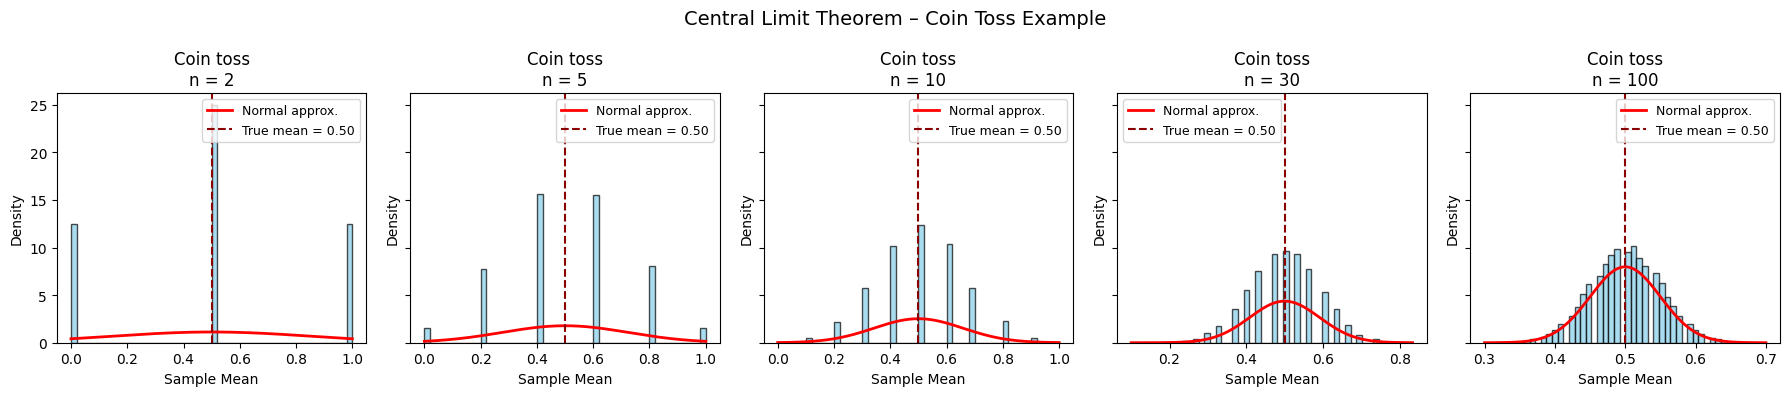

In [3]:
# ───────────────────────────────────────────────
#  1. Coin toss (Bernoulli p=0.5)
# ───────────────────────────────────────────────
print("\n=== 1. Fair coin toss (0 = tails, 1 = heads) ===")
p = 0.5
true_mean_coin = p
true_var_coin  = p * (1 - p)

fig, axes = plt.subplots(1, len(sample_sizes), figsize=(18, 4), sharey=True)
fig.suptitle("Central Limit Theorem – Coin Toss Example", fontsize=14)

for i, n in enumerate(sample_sizes):
    # Generate num_simulations sample means, each of size n
    samples = np.random.binomial(1, p, size=(num_simulations, n))
    means = samples.mean(axis=1)

    plot_clt(axes[i], means, n, "Coin toss", true_mean_coin, true_var_coin)

plt.tight_layout()
plt.show()


=== 2. Fair six-sided die ===


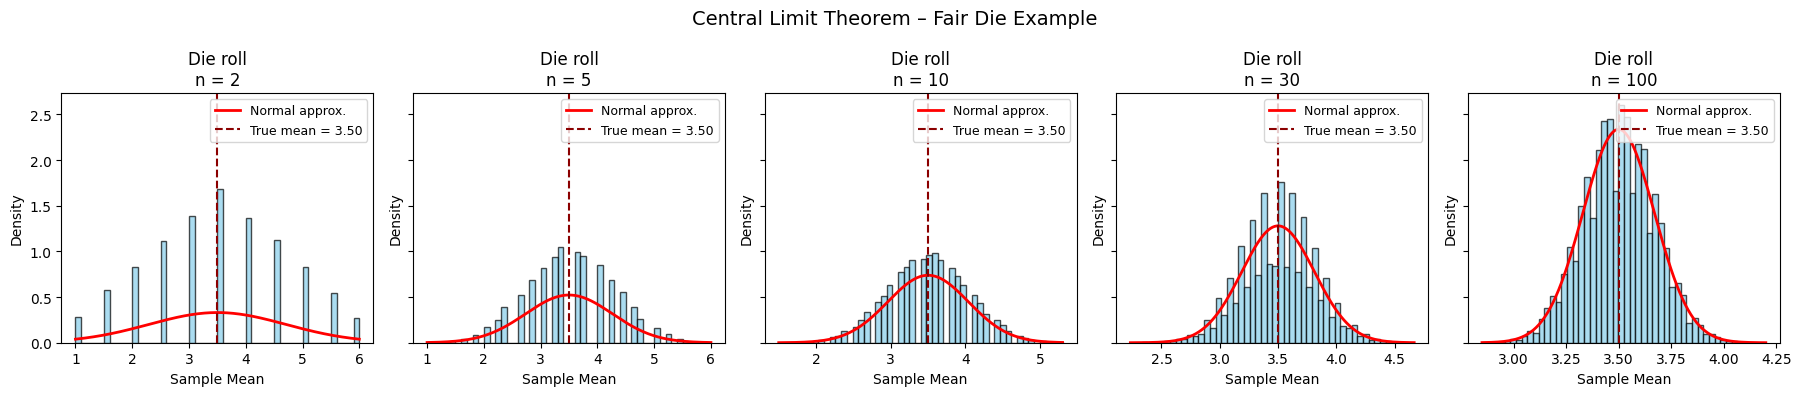

In [4]:
# ───────────────────────────────────────────────
#  2. Fair six-sided die (1 through 6)
# ───────────────────────────────────────────────
print("\n=== 2. Fair six-sided die ===")
die_values = np.array([1,2,3,4,5,6])
true_mean_die = die_values.mean()          # 3.5
true_var_die  = np.var(die_values)         # 35/12 ≈ 2.9167

fig, axes = plt.subplots(1, len(sample_sizes), figsize=(18, 4), sharey=True)
fig.suptitle("Central Limit Theorem – Fair Die Example", fontsize=14)

for i, n in enumerate(sample_sizes):
    samples = np.random.choice(die_values, size=(num_simulations, n))
    means = samples.mean(axis=1)

    plot_clt(axes[i], means, n, "Die roll", true_mean_die, true_var_die)

plt.tight_layout()
plt.show()

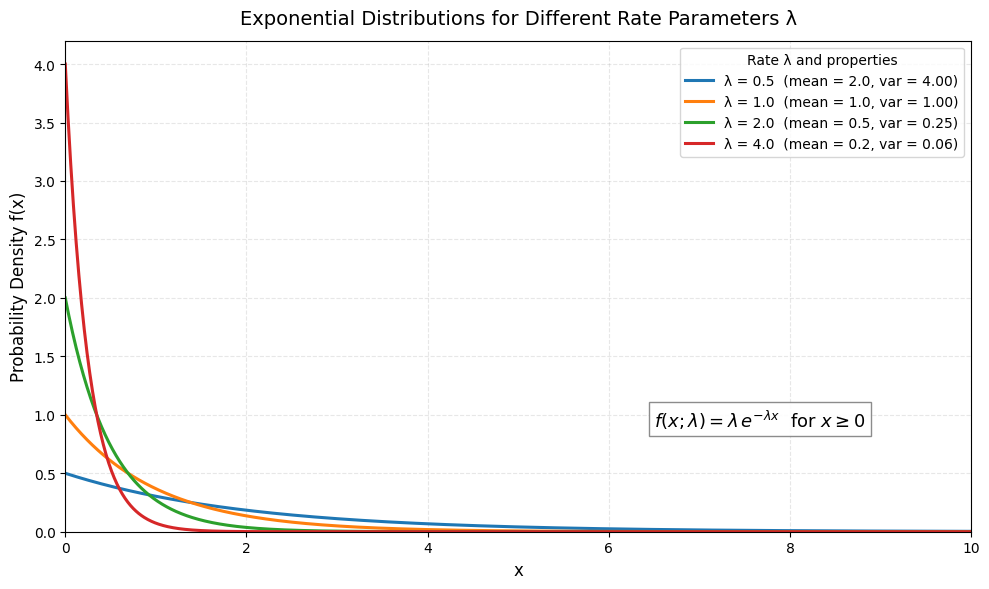

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# ───────────────────────────────────────────────
#  Parameters
# ───────────────────────────────────────────────
lambdas = [0.5, 1.0, 2.0, 4.0]           # different rate parameters λ
x_max = 10                               # plot range: 0 to x_max
x = np.linspace(0, x_max, 1000)          # fine grid for smooth curves

# ───────────────────────────────────────────────
#  Plot setup
# ───────────────────────────────────────────────
plt.figure(figsize=(10, 6))

for lam in lambdas:
    # Exponential PDF: f(x; λ) = λ e^(-λx) for x ≥ 0
    pdf = lam * np.exp(-lam * x)

    # Also compute mean and variance for legend
    mean = 1 / lam
    var  = 1 / (lam ** 2)

    label = f'λ = {lam:.1f}  (mean = {mean:.1f}, var = {var:.2f})'
    plt.plot(x, pdf, lw=2.2, label=label)

# ───────────────────────────────────────────────
#  Formatting
# ───────────────────────────────────────────────
plt.title("Exponential Distributions for Different Rate Parameters λ", fontsize=14, pad=12)
plt.xlabel("x", fontsize=12)
plt.ylabel("Probability Density f(x)", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=10, title="Rate λ and properties")
plt.xlim(0, x_max)
plt.ylim(0, None)

# Add formula annotation
plt.text(6.5, 0.9, r'$f(x;\lambda) = \lambda \, e^{-\lambda x}$  for $x \geq 0$',
         fontsize=13, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.9))

plt.tight_layout()
plt.show()


=== 3. Exponential distribution (rate λ=1) ===


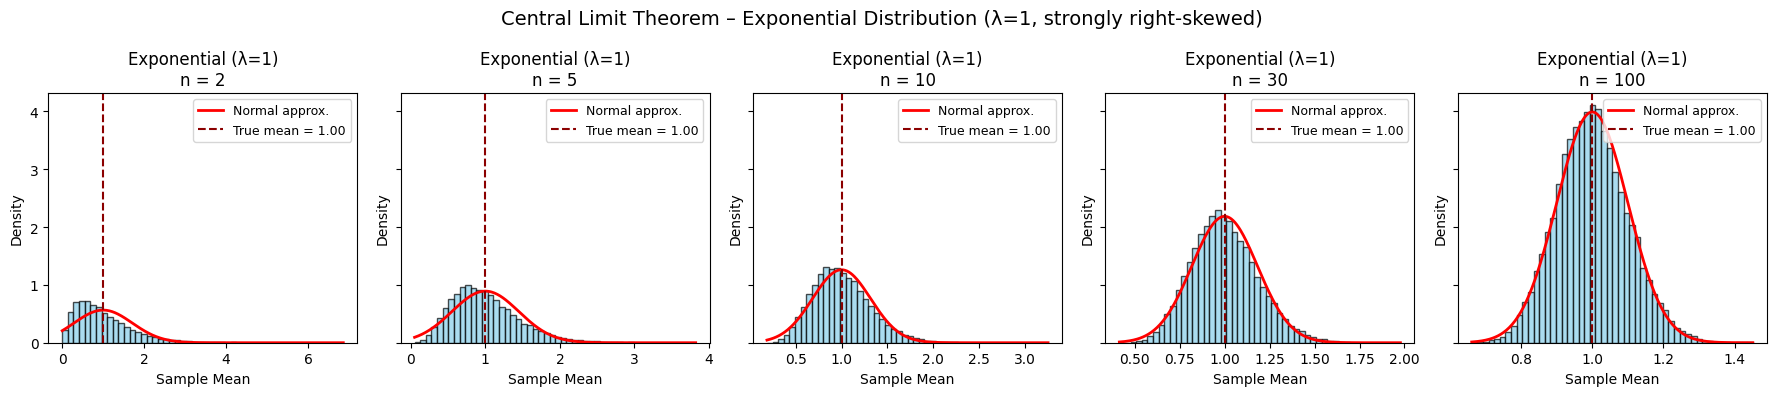


Observe how for the Exponential distribution:
• When n=2 or n=5:   histogram is still strongly right-skewed (long right tail)
• When n=10–30:      skewness starts to decrease, bell shape begins to emerge
• When n=100:        very close to normal — red curve and histogram overlap well
→ Exponential is one of the slowest distributions to converge under CLT because of its heavy right tail.


In [13]:
# ───────────────────────────────────────────────
#  3. Exponential distribution (very skewed, continuous)
# ───────────────────────────────────────────────
print("\n=== 3. Exponential distribution (rate λ=1) ===")

# Parameters for Exponential(λ=1)
lambda_rate   = 1.0
true_mean_exp = 1 / lambda_rate          # = 1.0
true_var_exp  = 1 / (lambda_rate ** 2)   # = 1.0

# Create figure with one subplot per sample size
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(18, 4), sharey=True)
fig.suptitle("Central Limit Theorem – Exponential Distribution (λ=1, strongly right-skewed)",
             fontsize=14)

for i, n in enumerate(sample_sizes):
    # Generate num_simulations independent samples, each containing n exponential values
    # np.random.exponential(scale=1/λ) gives mean = scale = 1/λ = 1.0
    samples = np.random.exponential(scale=1/lambda_rate, size=(num_simulations, n))

    # Compute the sample mean for each of the num_simulations groups
    means = samples.mean(axis=1)

    # Plot histogram + theoretical normal overlay
    plot_clt(axes[i], means, n, "Exponential (λ=1)", true_mean_exp, true_var_exp)

plt.tight_layout()
plt.show()

# Summary observation (printed after the plot)
print("\nObserve how for the Exponential distribution:")
print("• When n=2 or n=5:   histogram is still strongly right-skewed (long right tail)")
print("• When n=10–30:      skewness starts to decrease, bell shape begins to emerge")
print("• When n=100:        very close to normal — red curve and histogram overlap well")
print("→ Exponential is one of the slowest distributions to converge under CLT because of its heavy right tail.")


=== 3. Exponential distribution (rate λ=0.5) ===


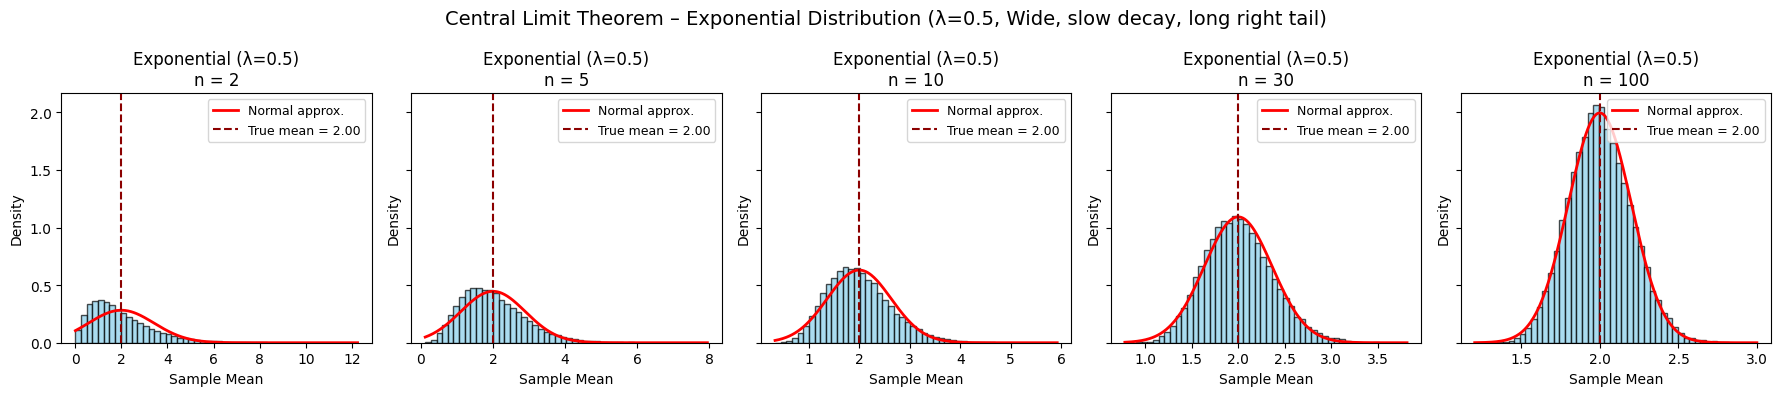


Observe how for the Exponential distribution:
• When n=2 or n=5:   histogram is still strongly right-skewed (long right tail)
• When n=10–30:      skewness starts to decrease, bell shape begins to emerge
• When n=100:        very close to normal — red curve and histogram overlap well
→ Exponential is one of the slowest distributions to converge under CLT because of its heavy right tail.


In [14]:
# ───────────────────────────────────────────────
#  3. Exponential distribution (very skewed, continuous)
# ───────────────────────────────────────────────
print("\n=== 3. Exponential distribution (rate λ=0.5) ===")

# Parameters for Exponential(λ=1)
lambda_rate   = 0.5
true_mean_exp = 1 / lambda_rate          # = 2
true_var_exp  = 1 / (lambda_rate ** 2)   # = 4

# Create figure with one subplot per sample size
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(18, 4), sharey=True)
fig.suptitle("Central Limit Theorem – Exponential Distribution (λ=0.5, Wide, slow decay, long right tail)",
             fontsize=14)

for i, n in enumerate(sample_sizes):
    # Generate num_simulations independent samples, each containing n exponential values
    # np.random.exponential(scale=1/λ) gives mean = scale = 1/λ = 1.0
    samples = np.random.exponential(scale=1/lambda_rate, size=(num_simulations, n))

    # Compute the sample mean for each of the num_simulations groups
    means = samples.mean(axis=1)

    # Plot histogram + theoretical normal overlay
    plot_clt(axes[i], means, n, "Exponential (λ=0.5)", true_mean_exp, true_var_exp)

plt.tight_layout()
plt.show()

# Summary observation (printed after the plot)
print("\nObserve how for the Exponential distribution:")
print("• When n=2 or n=5:   histogram is still strongly right-skewed (long right tail)")
print("• When n=10–30:      skewness starts to decrease, bell shape begins to emerge")
print("• When n=100:        very close to normal — red curve and histogram overlap well")
print("→ Exponential is one of the slowest distributions to converge under CLT because of its heavy right tail.")


=== 3. Exponential distribution (rate λ=0.2) ===


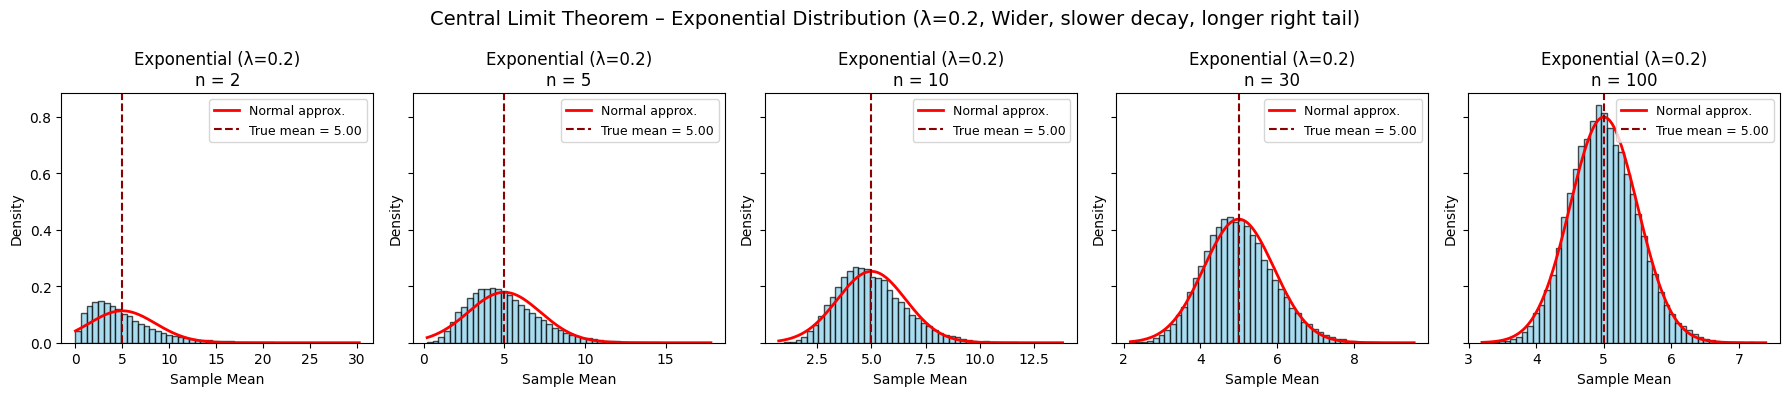


Observe how for the Exponential distribution:
• When n=2 or n=5:   histogram is still strongly right-skewed (long right tail)
• When n=10–30:      skewness starts to decrease, bell shape begins to emerge
• When n=100:        very close to normal — red curve and histogram overlap well
→ Exponential is one of the slowest distributions to converge under CLT because of its heavy right tail.


In [15]:
# ───────────────────────────────────────────────
#  3. Exponential distribution (very skewed, continuous)
# ───────────────────────────────────────────────
print("\n=== 3. Exponential distribution (rate λ=0.2) ===")

# Parameters for Exponential(λ=1)
lambda_rate   = 0.2
true_mean_exp = 1 / lambda_rate          # = 5
true_var_exp  = 1 / (lambda_rate ** 2)   # = 25

# Create figure with one subplot per sample size
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(18, 4), sharey=True)
fig.suptitle("Central Limit Theorem – Exponential Distribution (λ=0.2, Wider, slower decay, longer right tail)",
             fontsize=14)

for i, n in enumerate(sample_sizes):
    # Generate num_simulations independent samples, each containing n exponential values
    # np.random.exponential(scale=1/λ) gives mean = scale = 1/λ = 1.0
    samples = np.random.exponential(scale=1/lambda_rate, size=(num_simulations, n))

    # Compute the sample mean for each of the num_simulations groups
    means = samples.mean(axis=1)

    # Plot histogram + theoretical normal overlay
    plot_clt(axes[i], means, n, "Exponential (λ=0.2)", true_mean_exp, true_var_exp)

plt.tight_layout()
plt.show()

# Summary observation (printed after the plot)
print("\nObserve how for the Exponential distribution:")
print("• When n=2 or n=5:   histogram is still strongly right-skewed (long right tail)")
print("• When n=10–30:      skewness starts to decrease, bell shape begins to emerge")
print("• When n=100:        very close to normal — red curve and histogram overlap well")
print("→ Exponential is one of the slowest distributions to converge under CLT because of its heavy right tail.")